<a href="https://colab.research.google.com/github/Rajeshwari-11/IrisClassificatioApp/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries:**

In [ ]:
import joblib
import sklearn

print("joblib version:", joblib.__version__)
print("scikit-learn version:", sklearn.__version__)


joblib version: 1.3.2
scikit-learn version: 1.4.0


In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

**Load Iris Dataset:**

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

**Split the dataset into training and testing sets:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Scaling:**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Random Forest Classifier:**

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
rf_predictions = rf_classifier.predict(X_test_scaled)

**Evaluate Random Forest Model**

In [ ]:
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Classifier Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Save Random Forest Classifier:**

In [ ]:
joblib.dump(rf_classifier, 'random_forest_model.joblib', protocol=4)

['random_forest_model.joblib']

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=3)

**Train the Neural Network:**

In [ ]:
model.fit(X_train_scaled, y_train_one_hot, epochs=50, batch_size=8, validation_data=(X_test_scaled, y_test_one_hot))


Epoch 1/50
15/15 [==============================] - 1s 19ms/step - loss: 1.5056 - accuracy: 0.2250 - val_loss: 1.4239 - val_accuracy: 0.2000
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 1.4059 - accuracy: 0.2417 - val_loss: 1.3368 - val_accuracy: 0.2333
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 1.3183 - accuracy: 0.2917 - val_loss: 1.2621 - val_accuracy: 0.2667
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 1.2425 - accuracy: 0.3167 - val_loss: 1.1975 - val_accuracy: 0.2333
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 1.1760 - accuracy: 0.3250 - val_loss: 1.1389 - val_accuracy: 0.2333
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 1.1173 - accuracy: 0.3333 - val_loss: 1.0864 - val_accuracy: 0.2333
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 1.0646 - accuracy: 0.3167 - val_loss: 1.0396 - val_accuracy: 0.2667
Epoch 8/50
15/15 [=

**Evaluate Neural Network Model:**

In [ ]:
nn_predictions = np.argmax(model.predict(X_test_scaled), axis=-1)
print("Neural Network Accuracy:", accuracy_score(y_test, nn_predictions))
print("Classification Report:\n", classification_report(y_test, nn_predictions))

1/1 [==============================] - 0s 83ms/step
Neural Network Accuracy: 0.8666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.56      0.71         9
           2       0.73      1.00      0.85        11

    accuracy                           0.87        30
   macro avg       0.91      0.85      0.85        30
weighted avg       0.90      0.87      0.86        30



In [ ]:
# Save Neural Network Model
model.save('neural_network_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the StandardScaler for feature scaling
joblib.dump(scaler, 'feature_scaler.joblib')

['feature_scaler.joblib']

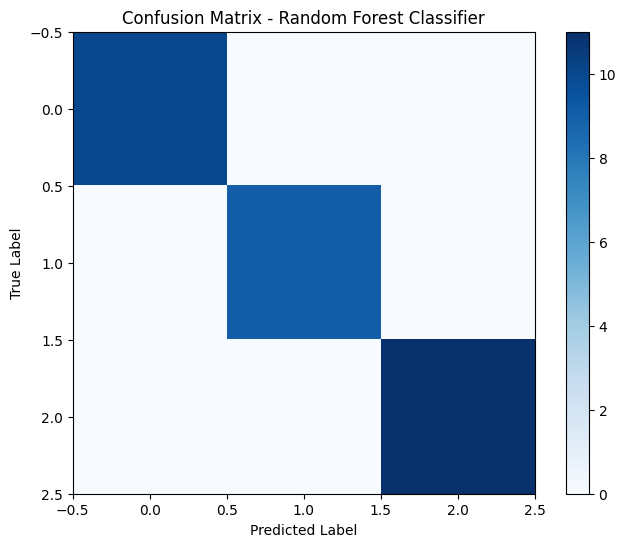

In [ ]:
plt.figure(figsize=(8, 6))
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)
plt.imshow(conf_matrix_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

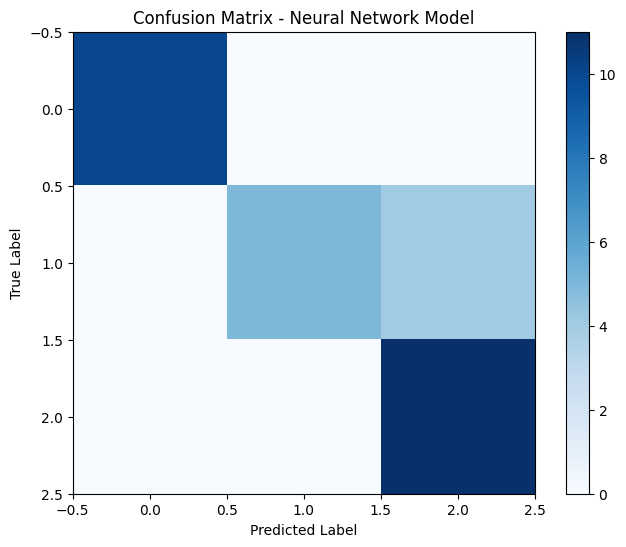

In [ ]:
plt.figure(figsize=(8, 6))
conf_matrix_nn = confusion_matrix(y_test, nn_predictions)
plt.imshow(conf_matrix_nn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Neural Network Model')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()